Use the network provided and stored in the file “stormofswords.csv”1 and
calculate the page rank of each node using the random walk process that we
described in the lecture.

a. Estimate the page rank for different lengths of walk (i.e., repetitions
of the random walk) and compare with the result you got from the
function pagerank of networkX library. For the comparison use the
Spearman ranking correlation. 

b. Using the networkX pagerank function experiment for different
“teleport” probabilities (for a fixed number of walk length) and for
each value of teleport probability (ranging from 0 to 1, with a step of
0.1) calculate the Gini coefficient of the PageRank values distribution.
The Gini coefficient takes as input a set of data points and returns a
value between 0 and 1. If the Gini is 0, then all the points have the
same value (i.e., all the nodes have the same page rank). If the Gini is
1, we have the maximum possibly inequality among the values
examined.

Plot the value of the page rank Gini coefficient for the
different values of the teleport probability. What do you observe?
Why?

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import igraph as ig
from scipy.stats import spearmanr
from scipy import stats

Node   Degree
Aemon      5
Grenn      4
Samwell     15
Aerys      4
Jaime     24
Robert     18
Tyrion     36
Tywin     22
Alliser      3
Mance     12
Amory      1
Oberyn      7
Arya     19
Anguy      2
Beric      6
Bran     14
Brynden      8
Cersei     20
Gendry      4
Gregor     12
Joffrey     18
Jon      26
Rickon      6
Roose      4
Sandor     13
Thoros      5
Balon      6
Loras      9
Belwas      4
Barristan      6
Illyrio      1
Hodor      4
Jojen      4
Luwin      2
Meera      5
Nan       2
Theon      4
Brienne      7
Bronn      4
Podrick      5
Lothar      5
Walder      8
Catelyn     18
Edmure      8
Hoster      3
Jeyne      2
Lysa     10
Petyr      7
Robb     25
Roslin      4
Sansa     26
Stannis     14
Elia      5
Ilyn      6
Meryn      7
Pycelle      4
Shae      5
Varys      7
Craster      5
Karl      1
Daario      4
Drogo      4
Irri      4
Daenerys     14
Aegon      1
Jorah      6
Kraznys      1
Missandei      2
Rakharo      1
Rhaegar      6
Viserys      3
Worm      1
Davos

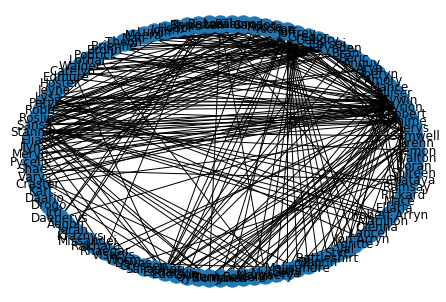

In [2]:
df = open('stormofswords.csv', "r")

next(df, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G = nx.parse_edgelist(df, delimiter=',', create_using=Graphtype,
                     nodetype=str, data=(('weight', float),))

print("Node   Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

# visualize the network
nx.draw_circular(G, with_labels=True)
plt.show()
df.close()


In [3]:
G.number_of_nodes()

107

I tried multiple ways to get estimates for the pagerank, I ended up with using the below code in repl.it because I couldn't work past an error in jupyter. 
https://repl.it/@harrington1/TornSlipperyPerimeter#main.py


f = open("stormofswords.csv", "r")
names = []
for x in f:
  y = x.split(",")
  if not y[0] in names:
    names.append(y[0])
  if not y[1] in names:
    names.append(y[1])
f.close()


namedict = {}
count = 0
for x in names:
  namedict[x] = count
  count += 1

matrix = np.zeros((count,count),np.float64)



f = open("stormofswords.csv", "r")
newcount = 0
datalist = []
for x in f:
  newcount+=1
  y = x.split(",")
  #matrix[namedict[y[1]]][namedict[y[0]]] = int(y[2].replace("\n","")) / 100
  matrix[namedict[y[1]]][namedict[y[0]]] = 1
  datalist.append(int(y[2].replace("\n","")))
f.close()
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(107, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

p = pagerank(matrix,200,.85)
zed = {}
zedcount = 0
mysum = 0
for x in p:
  zed[names[zedcount]] = x[0]
  mysum += x[0]
  zedcount+=1
counterdict = {}
for x in zed:
  greatercount = 0
  for y in zed:
    if zed[x] < zed[y]:
      greatercount += 1
  counterdict[x] = greatercount
print(counterdict)
finallist = []
for x in range(len(counterdict)):
  finallist.append("empty")
for x in counterdict:
  attemptedslot = counterdict[x]
  while finallist[attemptedslot] != "empty":
    attemptedslot += 1
  finallist[attemptedslot] = x
print(finallist)


In [3]:
def pageRank(G, alpha = 0.1):
    n = G.number_of_nodes()
    init_val = 1.0/n
    ranks = dict(zip(G.nodes(), [init_val]* n))
    
    new_ranks = ranks
    
    for node, prev_rank in ranks.items():
        rank_sum = 0.0
    
        for incoming_node in G.nodes:
            numerator = ranks[incoming_node]
            denominator = G.number_of_nodes()
            transfer_amount = numerator/denominator
            new_ranks[incoming_node] = new_ranks[incoming_node] - transfer_amount
            rank_sum = rank_sum +transfer_amount

        new_ranks[node] = ranks[node] + rank_sum
    
    ranks = new_ranks
    return ranks

In [4]:
estimate = pageRank(G, 0.1)
estimate

{'Aemon': 0.006876276497524216,
 'Grenn': 0.00690886404226844,
 'Samwell': 0.006941759016680055,
 'Aerys': 0.006974964321038968,
 'Jaime': 0.007008482882986154,
 'Robert': 0.007042317657781897,
 'Tyrion': 0.007076471628566294,
 'Tywin': 0.007110947806622238,
 'Alliser': 0.007145749231640964,
 'Mance': 0.007180878971990065,
 'Amory': 0.007216340124983976,
 'Oberyn': 0.007252135817157069,
 'Arya': 0.0072882692045393195,
 'Anguy': 0.0073247434729346505,
 'Beric': 0.007361561838201613,
 'Bran': 0.007398727546537133,
 'Brynden': 0.0074362438747625995,
 'Cersei': 0.007474114130612856,
 'Gendry': 0.0075123416530277305,
 'Gregor': 0.00755092981244651,
 'Joffrey': 0.007589882011105084,
 'Jon': 0.007629201683335915,
 'Rickon': 0.00766889229587084,
 'Roose': 0.007708957348146626,
 'Sandor': 0.0077494003726137,
 'Thoros': 0.00779022493504746,
 'Balon': 0.007831434634862652,
 'Loras': 0.007873033105430824,
 'Belwas': 0.007915024014400576,
 'Barristan': 0.007957411064020991,
 'Illyrio': 0.0080001979

In [5]:
est = list(estimate.items())
est_array = np.array(est)
est_array

array([['Aemon', '0.006876276497524216'],
       ['Grenn', '0.00690886404226844'],
       ['Samwell', '0.006941759016680055'],
       ['Aerys', '0.006974964321038968'],
       ['Jaime', '0.007008482882986154'],
       ['Robert', '0.007042317657781897'],
       ['Tyrion', '0.007076471628566294'],
       ['Tywin', '0.007110947806622238'],
       ['Alliser', '0.007145749231640964'],
       ['Mance', '0.007180878971990065'],
       ['Amory', '0.007216340124983976'],
       ['Oberyn', '0.007252135817157069'],
       ['Arya', '0.0072882692045393195'],
       ['Anguy', '0.0073247434729346505'],
       ['Beric', '0.007361561838201613'],
       ['Bran', '0.007398727546537133'],
       ['Brynden', '0.0074362438747625995'],
       ['Cersei', '0.007474114130612856'],
       ['Gendry', '0.0075123416530277305'],
       ['Gregor', '0.00755092981244651'],
       ['Joffrey', '0.007589882011105084'],
       ['Jon', '0.007629201683335915'],
       ['Rickon', '0.00766889229587084'],
       ['Roose', '0.00

In [4]:
#using the function pagerank
pr=nx.pagerank(G,0.1) 
pr

{'Aemon': 0.008755243805532584,
 'Grenn': 0.009020076304108594,
 'Samwell': 0.011839966188729015,
 'Aerys': 0.008577495432874649,
 'Jaime': 0.01320839948523784,
 'Robert': 0.009846894053333256,
 'Tyrion': 0.015909800964405047,
 'Tywin': 0.010651800063304023,
 'Alliser': 0.008716954874462406,
 'Mance': 0.010441728459788467,
 'Amory': 0.008479270809162422,
 'Oberyn': 0.010344259549808235,
 'Arya': 0.011505936544368248,
 'Anguy': 0.008507759702108417,
 'Beric': 0.00928012660210718,
 'Bran': 0.011748582472443396,
 'Brynden': 0.009104697517377296,
 'Cersei': 0.010135564478334335,
 'Gendry': 0.008783756300786722,
 'Gregor': 0.009683701405387633,
 'Joffrey': 0.010424952764717008,
 'Jon': 0.0147963503814064,
 'Rickon': 0.008893023206548986,
 'Roose': 0.008500631374022613,
 'Sandor': 0.009501787149247824,
 'Thoros': 0.008952391633252317,
 'Balon': 0.008569253864062069,
 'Loras': 0.009296486107969085,
 'Belwas': 0.009842494212411936,
 'Barristan': 0.009091321616817652,
 'Illyrio': 0.008558116036

In [5]:
pr = list(pr.items())
pr_array = np.array(pr)
pr_array

array([['Aemon', '0.008755243805532584'],
       ['Grenn', '0.009020076304108594'],
       ['Samwell', '0.011839966188729015'],
       ['Aerys', '0.008577495432874649'],
       ['Jaime', '0.01320839948523784'],
       ['Robert', '0.009846894053333256'],
       ['Tyrion', '0.015909800964405047'],
       ['Tywin', '0.010651800063304023'],
       ['Alliser', '0.008716954874462406'],
       ['Mance', '0.010441728459788467'],
       ['Amory', '0.008479270809162422'],
       ['Oberyn', '0.010344259549808235'],
       ['Arya', '0.011505936544368248'],
       ['Anguy', '0.008507759702108417'],
       ['Beric', '0.00928012660210718'],
       ['Bran', '0.011748582472443396'],
       ['Brynden', '0.009104697517377296'],
       ['Cersei', '0.010135564478334335'],
       ['Gendry', '0.008783756300786722'],
       ['Gregor', '0.009683701405387633'],
       ['Joffrey', '0.010424952764717008'],
       ['Jon', '0.0147963503814064'],
       ['Rickon', '0.008893023206548986'],
       ['Roose', '0.0085006

In [231]:
newarray = []
for x in est_array:
    newarray.append([x[1]])
    count = 0
for y in pr_array:
    newarray[count].append(y[1])
    count +=1
newarray

[['0.006876276497524216', '0.008755243805532584'],
 ['0.00690886404226844', '0.009020076304108594'],
 ['0.006941759016680055', '0.011839966188729015'],
 ['0.006974964321038968', '0.008577495432874649'],
 ['0.007008482882986154', '0.01320839948523784'],
 ['0.007042317657781897', '0.009846894053333256'],
 ['0.007076471628566294', '0.015909800964405047'],
 ['0.007110947806622238', '0.010651800063304023'],
 ['0.007145749231640964', '0.008716954874462406'],
 ['0.007180878971990065', '0.010441728459788467'],
 ['0.007216340124983976', '0.008479270809162422'],
 ['0.007252135817157069', '0.010344259549808235'],
 ['0.0072882692045393195', '0.011505936544368248'],
 ['0.0073247434729346505', '0.008507759702108417'],
 ['0.007361561838201613', '0.00928012660210718'],
 ['0.007398727546537133', '0.011748582472443396'],
 ['0.0074362438747625995', '0.009104697517377296'],
 ['0.007474114130612856', '0.010135564478334335'],
 ['0.0075123416530277305', '0.008783756300786722'],
 ['0.00755092981244651', '0.00

In [232]:
newarray = np.array(newarray)
newarray

array([['0.006876276497524216', '0.008755243805532584'],
       ['0.00690886404226844', '0.009020076304108594'],
       ['0.006941759016680055', '0.011839966188729015'],
       ['0.006974964321038968', '0.008577495432874649'],
       ['0.007008482882986154', '0.01320839948523784'],
       ['0.007042317657781897', '0.009846894053333256'],
       ['0.007076471628566294', '0.015909800964405047'],
       ['0.007110947806622238', '0.010651800063304023'],
       ['0.007145749231640964', '0.008716954874462406'],
       ['0.007180878971990065', '0.010441728459788467'],
       ['0.007216340124983976', '0.008479270809162422'],
       ['0.007252135817157069', '0.010344259549808235'],
       ['0.0072882692045393195', '0.011505936544368248'],
       ['0.0073247434729346505', '0.008507759702108417'],
       ['0.007361561838201613', '0.00928012660210718'],
       ['0.007398727546537133', '0.011748582472443396'],
       ['0.0074362438747625995', '0.009104697517377296'],
       ['0.007474114130612856',

In [233]:
newarray.astype(np.float)

array([[0.00687628, 0.00875524],
       [0.00690886, 0.00902008],
       [0.00694176, 0.01183997],
       [0.00697496, 0.0085775 ],
       [0.00700848, 0.0132084 ],
       [0.00704232, 0.00984689],
       [0.00707647, 0.0159098 ],
       [0.00711095, 0.0106518 ],
       [0.00714575, 0.00871695],
       [0.00718088, 0.01044173],
       [0.00721634, 0.00847927],
       [0.00725214, 0.01034426],
       [0.00728827, 0.01150594],
       [0.00732474, 0.00850776],
       [0.00736156, 0.00928013],
       [0.00739873, 0.01174858],
       [0.00743624, 0.0091047 ],
       [0.00747411, 0.01013556],
       [0.00751234, 0.00878376],
       [0.00755093, 0.0096837 ],
       [0.00758988, 0.01042495],
       [0.0076292 , 0.01479635],
       [0.00766889, 0.00889302],
       [0.00770896, 0.00850063],
       [0.0077494 , 0.00950179],
       [0.00779022, 0.00895239],
       [0.00783143, 0.00856925],
       [0.00787303, 0.00929649],
       [0.00791502, 0.00984249],
       [0.00795741, 0.00909132],
       [0.

In [234]:
newarraytwo = []
newarraythree = []
for x in est_array:
    newarraytwo.append(float(x[1]))
for y in pr_array:
    newarraythree.append(float(y[1]))
stats.spearmanr(newarraytwo, newarraythree)

SpearmanrResult(correlation=-0.514518309528008, pvalue=1.4347135063674123e-08)

In [235]:
#use the Spearman ranking correlation
#this keeps the names in the comparison
stats.spearmanr(est_array.ravel(), pr_array.ravel())

SpearmanrResult(correlation=0.810697613194927, pvalue=3.455914518810743e-51)

In [236]:
#use the Spearman ranking correlation
#this does not
stats.spearmanr(newarray)

SpearmanrResult(correlation=-0.514518309528008, pvalue=1.4347135063674123e-08)

It looks like my data is in the opposite order that it should be, but in terms of correlation strength, there is little correlation. With a small p-value, the null hypothesis is significant. 


https://repl.it/@harrington1/TornSlipperyPerimeter#main.py

^this is the alternative method I attempted in repl, since one of the code segments I tried wouldnt work in jupyter; it has a positive correlation and makes more sense

Gini Coefficient calc

In [6]:
pr_array1 = np.delete(pr_array, [0], axis=1)
pr_array1

array([['0.008755243805532584'],
       ['0.009020076304108594'],
       ['0.011839966188729015'],
       ['0.008577495432874649'],
       ['0.01320839948523784'],
       ['0.009846894053333256'],
       ['0.015909800964405047'],
       ['0.010651800063304023'],
       ['0.008716954874462406'],
       ['0.010441728459788467'],
       ['0.008479270809162422'],
       ['0.010344259549808235'],
       ['0.011505936544368248'],
       ['0.008507759702108417'],
       ['0.00928012660210718'],
       ['0.011748582472443396'],
       ['0.009104697517377296'],
       ['0.010135564478334335'],
       ['0.008783756300786722'],
       ['0.009683701405387633'],
       ['0.010424952764717008'],
       ['0.0147963503814064'],
       ['0.008893023206548986'],
       ['0.008500631374022613'],
       ['0.009501787149247824'],
       ['0.008952391633252317'],
       ['0.008569253864062069'],
       ['0.009296486107969085'],
       ['0.009842494212411936'],
       ['0.009091321616817652'],
       ['0.008

(array([51., 25.,  8.,  6.,  2.,  5.,  0.,  0.,  3.,  2.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([0.00842565, 0.00879986, 0.00917407, 0.00954827, 0.00992248,
        0.01029669, 0.0106709 , 0.0110451 , 0.01141931, 0.01179352,
        0.01216773, 0.01254193, 0.01291614, 0.01329035, 0.01366456,
        0.01403876, 0.01441297, 0.01478718, 0.01516139, 0.01553559,
        0.0159098 ]),
 <a list of 20 Patch objects>)

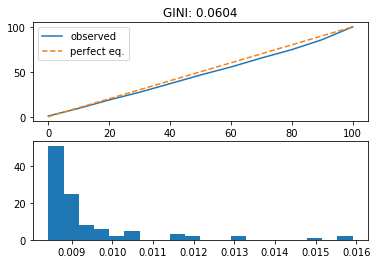

In [7]:
def gini(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = pr_array1.astype(np.float)
bins, result, gini_val = gini(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")

plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

Using the networkX pagerank function experiment for different “teleport” probabilities (for a fixed number of walk length) and for each value of teleport probability (ranging from 0 to 1, with a step of 0.1) calculate the Gini coefficient of the PageRank values distribution. The Gini coefficient takes as input a set of data points and returns a value between 0 and 1. If the Gini is 0, then all the points have the same value (i.e., all the nodes have the same page rank). If the Gini is 1, we have the maximum possibly inequality among the values examined.
Plot the value of the page rank Gini coefficient for the different values of the teleport probability. What do you observe? Why?

In [8]:
gini_val

0.06040317984515659

In [10]:
def gini(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val



In [16]:
rank_arr = []
bins_arr = []
result_arr = []
gini_arr = []

for x in range(9):
    pr=nx.pagerank(G,((x+1)/10))
    pr = list(pr.items())
    pr_array = np.array(pr)
    
    pr_array1 = np.delete(pr_array, [0], axis=1)
    pr_array1
    
    v = pr_array1.astype(np.float)
    
    bins, result, gini_val = gini(v)
    gini_arr.append(gini_val)
    bins_arr.append(bins)
    result_arr.append(result)

In [17]:
gini_arr

[0.06040317984515659,
 0.11973940904858646,
 0.1767616728223049,
 0.23191422704066653,
 0.28554932468509,
 0.33832966520894897,
 0.3905537675366897,
 0.44305291587191115,
 0.4970723676063359]

If the Gini is 0, then all the points have the same value (i.e., all the nodes have the same page rank). If the Gini is 1, we have the maximum possibly inequality among the values examined. So in this case, we can see that all have variation in value. 

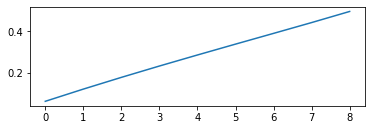

In [18]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(gini_arr)


Changing the teleport probability affects the rate of how many iterations it takes to converge; as alpha increases, the iterations needed to converge decreases. This makes sense because smaller walks will require more steps to converge on a point. Alpha represents how often it is going to teleport, so I found that trying to calculate the Gini coefficient for 1.0 would result in an error reporting that never converges, resulting in unusable data. 